<a href="https://colab.research.google.com/github/codyviscardis/LoanDefaultRisk/blob/main/DeepLearning_LoanDefaultRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Import

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: codyviscardis
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior


100%|██████████| 5.15M/5.15M [00:00<00:00, 36.8MB/s]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import math
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
file=('loan-prediction-based-on-customer-behavior/Training Data.csv')
dataset = pd.read_csv(file, delimiter=',' , skipinitialspace=True)

In [ ]:
dataset.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
print(dataset.shape)

(252000, 13)


In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB
None


#Categoricals to Numericals

In [ ]:
if dataset['Married/Single'][0] == 'married' or dataset['Married/Single'][0] == 'single':
    dataset['Married/Single'] = dataset['Married/Single'].map({'married': 1, 'single': 0})

In [ ]:
dataset.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,0,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,0,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,0,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,0,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,0,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [ ]:
print(dataset['Married/Single'].unique())

[0 1]


In [ ]:
print(dataset['House_Ownership'].unique())

['rented' 'norent_noown' 'owned']


In [ ]:
if dataset['House_Ownership'][0] == 'norent_noown' or dataset['House_Ownership'][0] == 'rented' or dataset['House_Ownership'][0] == 'owned':
    dataset['House_Ownership'] = dataset['House_Ownership'].map({'norent_noown': 0, 'rented': 1, 'owned' : 2})

In [ ]:
print(dataset['House_Ownership'].unique())

[1 0 2]


In [ ]:
print(dataset['Car_Ownership'].unique())

['no' 'yes']


In [ ]:
if dataset['Car_Ownership'][0] == 'no' or dataset['Car_Ownership'][0] == 'yes':
    dataset['Car_Ownership'] = dataset['Car_Ownership'].map({'no' : 0, 'yes' : 1})

In [ ]:
print(dataset['Car_Ownership'].unique())

[0 1]


In [ ]:
print(dataset['Car_Ownership'][dataset['Car_Ownership'][0]])

0


In [ ]:
print(dataset['Profession'].unique())
print(len(dataset['Profession'].unique()))

['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']
51


In [ ]:
dataset['Profession'] = dataset['Profession'].map({
    'Mechanical_engineer' : 0,
    'Software_Developer' : 1,
    'Technical_writer' : 2,
    'Civil_servant' : 3,
    'Librarian' : 4,
    'Economist' : 5,
    'Flight_attendant' : 6,
    'Architect' : 7,
    'Designer' : 8,
    'Physician' : 9,
    'Financial_Analyst' : 10,
    'Air_traffic_controller' : 11,
    'Politician' : 12,
    'Police_officer' : 13,
    'Artist' : 14,
    'Surveyor' : 15,
    'Design_Engineer' : 16,
    'Chemical_engineer' : 17,
    'Hotel_Manager' : 18,
    'Dentist' : 19,
    'Comedian' : 20,
    'Biomedical_Engineer' : 21,
    'Graphic_Designer' : 22,
    'Computer_hardware_engineer' : 23,
    'Petroleum_Engineer' : 24,
    'Secretary' : 25,
    'Computer_operator' : 26,
    'Chartered_Accountant' : 27,
    'Technician' : 28,
    'Microbiologist' : 29,
    'Fashion_Designer' : 30,
    'Aviator' : 31,
    'Psychologist' : 32,
    'Magistrate' : 33,
    'Lawyer' : 34,
    'Firefighter' : 35,
    'Engineer' : 36,
    'Official' : 37,
    'Analyst' : 38,
    'Geologist' : 39,
    'Drafter' : 40,
    'Statistician' : 41,
    'Web_designer' : 42,
    'Consultant' : 43,
    'Chef' : 44,
    'Army_officer' : 45,
    'Surgeon' : 46,
    'Scientist' : 47,
    'Civil_engineer' : 48,
    'Industrial_Engineer' : 49,
    'Technology_specialist' : 50,
    })

In [ ]:
print(dataset['Profession'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


In [ ]:
dataset.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,0,1,0,46,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,0,1,0,45,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,0,1,0,16,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,0,1,0,22,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,0,1,0,41,Avadi,Tamil_Nadu,7,11,0


In [ ]:
print(dataset['CITY'].unique())
print(len(dataset['CITY'].unique()))

['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'
 'Jalgaon' 'Tiruppur' 'Jamnagar' 'Kota[6]' 'Karimnagar' 'Hajipur[31]'
 'Adoni' 'Erode[17]' 'Kollam' 'Madurai' 'Anantapuram[24]' 'Kamarhati'
 'Bhusawal' 'Sirsa' 'Amaravati' 'Secunderabad' 'Ahmedabad' 'Ajmer'
 'Ongole' 'Miryalaguda' 'Ambattur' 'Indore' 'Pondicherry' 'Shimoga'
 'Chennai' 'Gulbarga' 'Khammam' 'Saharanpur' 'Gopalpur' 'Amravati' 'Udupi'
 'Howrah' 'Aurangabad[39]' 'Hospet' 'Shimla' 'Khandwa' 'Bidhannagar'
 'Bellary' 'Danapur' 'Purnia[26]' 'Bijapur' 'Patiala' 'Malda' 'Sagar'
 'Durgapur' 'Junagadh' 'Singrauli' 'Agartala' 'Thanjavur' 'Hindupur'
 'Naihati' 'North_Dumdum' 'Panchkula' 'Anantapur' 'Serampore' 'Bathinda'
 'Nadiad' 'Kanpur' 'Haridwar' 'Berhampur' 'Jamshedpur' 'Hyderabad' 'Bidar'
 'Kottayam' 'Solapur' 'Suryapet' 'Aizawl' 'Asansol' 'Deoghar' 'Eluru[25]'
 'Ulhasnagar' 'Aligarh' 'South_Dumdum' 'Berhampore' 'Gandhinagar'
 'Sonipat' 'Muzaffarpur' 'Raichur' 'Rajpur_Sonarpur' 'Ambarnath' 'Katihar'
 'Kozhikode'

In [ ]:
if isinstance(dataset['CITY'][0], dict) == False:
    city_dict = {}

    for i in range(len(dataset['CITY'].unique())):
        city_dict[dataset['CITY'].unique()[i]] = i

    print(city_dict)

{'Rewa': 0, 'Parbhani': 1, 'Alappuzha': 2, 'Bhubaneswar': 3, 'Tiruchirappalli[10]': 4, 'Jalgaon': 5, 'Tiruppur': 6, 'Jamnagar': 7, 'Kota[6]': 8, 'Karimnagar': 9, 'Hajipur[31]': 10, 'Adoni': 11, 'Erode[17]': 12, 'Kollam': 13, 'Madurai': 14, 'Anantapuram[24]': 15, 'Kamarhati': 16, 'Bhusawal': 17, 'Sirsa': 18, 'Amaravati': 19, 'Secunderabad': 20, 'Ahmedabad': 21, 'Ajmer': 22, 'Ongole': 23, 'Miryalaguda': 24, 'Ambattur': 25, 'Indore': 26, 'Pondicherry': 27, 'Shimoga': 28, 'Chennai': 29, 'Gulbarga': 30, 'Khammam': 31, 'Saharanpur': 32, 'Gopalpur': 33, 'Amravati': 34, 'Udupi': 35, 'Howrah': 36, 'Aurangabad[39]': 37, 'Hospet': 38, 'Shimla': 39, 'Khandwa': 40, 'Bidhannagar': 41, 'Bellary': 42, 'Danapur': 43, 'Purnia[26]': 44, 'Bijapur': 45, 'Patiala': 46, 'Malda': 47, 'Sagar': 48, 'Durgapur': 49, 'Junagadh': 50, 'Singrauli': 51, 'Agartala': 52, 'Thanjavur': 53, 'Hindupur': 54, 'Naihati': 55, 'North_Dumdum': 56, 'Panchkula': 57, 'Anantapur': 58, 'Serampore': 59, 'Bathinda': 60, 'Nadiad': 61, 'K

In [ ]:
if city_dict is not None:
    dataset['CITY'] = dataset['CITY'].map(city_dict)

In [ ]:
print(dataset['CITY'].unique())

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
dataset.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,0,1,0,46,220,West_Bengal,6,11,0
251996,251997,2843572,26,10,0,1,0,45,0,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,0,1,0,16,106,Maharashtra,7,12,0
251998,251999,6507128,45,0,0,1,0,22,27,Puducherry,0,10,0
251999,252000,9070230,70,17,0,1,0,41,262,Tamil_Nadu,7,11,0


In [ ]:
print(dataset['STATE'].unique())
print(len(dataset['STATE'].unique()))

['Madhya_Pradesh' 'Maharashtra' 'Kerala' 'Odisha' 'Tamil_Nadu' 'Gujarat'
 'Rajasthan' 'Telangana' 'Bihar' 'Andhra_Pradesh' 'West_Bengal' 'Haryana'
 'Puducherry' 'Karnataka' 'Uttar_Pradesh' 'Himachal_Pradesh' 'Punjab'
 'Tripura' 'Uttarakhand' 'Jharkhand' 'Mizoram' 'Assam' 'Jammu_and_Kashmir'
 'Delhi' 'Chhattisgarh' 'Chandigarh' 'Uttar_Pradesh[5]' 'Manipur' 'Sikkim']
29


In [ ]:
dataset['STATE'] = dataset['STATE'].map({
    'Madhya_Pradesh' : 0,
    'Maharashtra' : 1,
    'Kerala' : 2,
    'Odisha' : 3,
    'Tamil_Nadu' : 4,
    'Gujarat' : 5,
    'Rajasthan' : 6,
    'Telangana' : 7,
    'Bihar' : 8,
    'Andhra_Pradesh' : 9,
    'West_Bengal' : 10,
    'Haryana' : 11,
    'Puducherry' : 12,
    'Karnataka' : 13,
    'Uttar_Pradesh' : 14,
    'Himachal_Pradesh' : 15,
    'Punjab' : 16,
    'Tripura' : 17,
    'Uttarakhand' : 18,
    'Jharkhand' : 19,
    'Mizoram' : 20,
    'Assam' : 21,
    'Jammu_and_Kashmir' : 22,
    'Delhi' : 23,
    'Chhattisgarh' : 24,
    'Chandigarh' : 25,
    'Uttar_Pradesh[5]' : 26,
    'Manipur' : 27,
    'Sikkim' : 28,})

In [ ]:
print(dataset['STATE'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


In [ ]:
dataset.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,0,1,0,46,220,10,6,11,0
251996,251997,2843572,26,10,0,1,0,45,0,0,6,11,0
251997,251998,4522448,46,7,0,1,0,16,106,1,7,12,0
251998,251999,6507128,45,0,0,1,0,22,27,12,0,10,0
251999,252000,9070230,70,17,0,1,0,41,262,4,7,11,0


#Training/Testing Data Splitting and Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
idDroppedDataset = dataset.copy(deep=True)
idDroppedDataset.drop(['Id'], axis=1, inplace=True)


X_train, X_test, Y_train, Y_test = train_test_split(idDroppedDataset, idDroppedDataset.pop('Risk_Flag'), test_size = 0.1, random_state=42)

In [ ]:
X_train.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
96991,6730834,33,20,0,1,0,16,85,8,12,13
173604,4719877,74,15,0,1,0,3,20,7,11,10
183390,1051358,43,14,0,1,0,23,26,0,7,10
125078,753735,45,1,0,1,0,34,237,7,1,11
177720,4609641,26,17,0,1,0,20,116,0,9,10


In [ ]:
Y_train.head()

96991     0
173604    0
183390    0
125078    0
177720    1
Name: Risk_Flag, dtype: int64

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(226800, 11)
(25200, 11)
(226800,)
(25200,)


In [ ]:
def z_score_normalization(data):
  mean= np.mean(data,axis=0)
  std= np.std(data,axis=0)
  normalized_data= (data-mean) /std
  return normalized_data

In [ ]:
X_train = z_score_normalization(X_train)
X_test = z_score_normalization(X_test)

In [ ]:
X_train.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
96991,0.601527,-0.994864,1.652566,-0.337263,-0.079847,-0.657321,-0.604031,-0.775617,-0.213722,1.555065,0.716031
173604,-0.096742,1.406476,0.819443,-0.337263,-0.079847,-0.657321,-1.489962,-1.493826,-0.368749,1.280812,-1.428761
183390,-1.370570,-0.409171,0.652819,-0.337263,-0.079847,-0.657321,-0.126991,-1.427530,-1.453938,0.183801,-1.428761
125078,-1.473914,-0.292033,-1.513299,-0.337263,-0.079847,-0.657321,0.622643,0.903885,-0.368749,-1.461715,-0.713830
177720,-0.135020,-1.404849,1.152692,-0.337263,-0.079847,-0.657321,-0.331437,-0.433087,-1.453938,0.732307,-1.428761


In [ ]:
Y_train.head()

96991     0
173604    0
183390    0
125078    0
177720    1
Name: Risk_Flag, dtype: int64

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.Adam(learning_rate=0.005)

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode="min")

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=512, validation_split=0.1, callbacks=[callback])

Epoch 1/100
399/399 [==============================] - 3s 5ms/step - loss: 0.3860 - accuracy: 0.8760 - val_loss: 0.3762 - val_accuracy: 0.8750
Epoch 2/100
399/399 [==============================] - 2s 4ms/step - loss: 0.3739 - accuracy: 0.8774 - val_loss: 0.3743 - val_accuracy: 0.8750
Epoch 3/100
399/399 [==============================] - 2s 4ms/step - loss: 0.3723 - accuracy: 0.8774 - val_loss: 0.3733 - val_accuracy: 0.8750
Epoch 4/100
399/399 [==============================] - 2s 4ms/step - loss: 0.3706 - accuracy: 0.8774 - val_loss: 0.3729 - val_accuracy: 0.8750
Epoch 5/100
399/399 [==============================] - 2s 5ms/step - loss: 0.3695 - accuracy: 0.8774 - val_loss: 0.3715 - val_accuracy: 0.8750
Epoch 6/100
399/399 [==============================] - 2s 6ms/step - loss: 0.3688 - accuracy: 0.8774 - val_loss: 0.3709 - val_accuracy: 0.8750
Epoch 7/100
399/399 [==============================] - 2s 4ms/step - loss: 0.3684 - accuracy: 0.8774 - val_loss: 0.3711 - val_accuracy: 0.8750

In [ ]:
model.evaluate(X_test, Y_test)

788/788 [==============================] - 1s 2ms/step - loss: 0.3660 - accuracy: 0.8754


[0.36596882343292236, 0.8754364848136902]

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                192       
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                272       
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 16)               

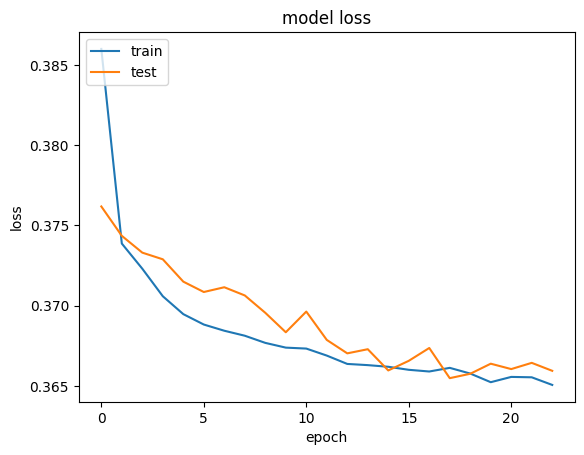

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

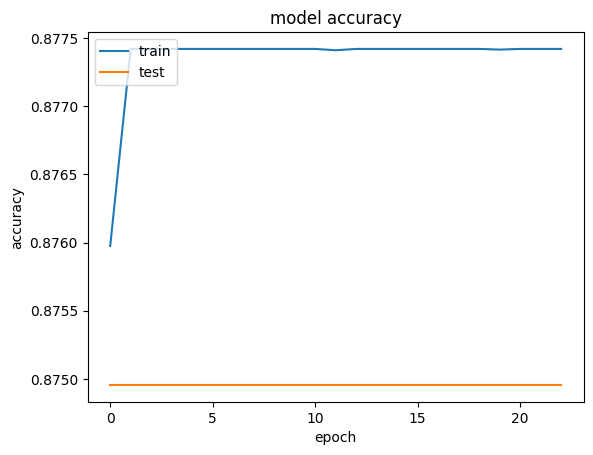

In [ ]:
plt.clf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show